<a href="https://colab.research.google.com/github/strawbaeri/CCINSYSL_ASSIGNMENT_COM-DF211/blob/main/exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

Create your first machine learning model using the KNN algorithm

Follow the instruction in each number.

| Gender | Classification |
|---|---|
| 0 | Male
| 1 | Female

| Index | Classification |
|---|---|
| 0 | Extremely Weak
| 1 | Weak
| 2 | Normal
| 3 | Overweight
| 4 | Obesity
| 5 | Extreme Obesity

1. Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the csv file

In [6]:
dataframe = pd.read_csv('height_weight.csv')

3. Display the first 5 rows of the dataset

In [7]:
dataframe.head()

,Gender,Height,Weight,Index
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3


4. Display the general information of the dataset

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  500 non-null    int64
 1   Height  500 non-null    int64
 2   Weight  500 non-null    int64
 3   Index   500 non-null    int64
dtypes: int64(4)
memory usage: 15.8 KB


5. Display the count, mean, standard deviation, min, max of each column in the dataset

In [10]:
dataframe.describe()

,Gender,Height,Weight,Index
count,500.000000,500.000000,500.000000,500.000000
mean,0.510000,169.944000,106.000000,3.748000
std,0.500401,16.375261,32.382607,1.355053
min,0.000000,140.000000,50.000000,0.000000
25%,0.000000,156.000000,80.000000,3.000000
50%,1.000000,170.500000,106.000000,4.000000
75%,1.000000,184.000000,136.000000,5.000000
max,1.000000,199.000000,160.000000,5.000000


6. Display the number of rows for each label in the dataset

In [12]:
dataframe['Index'].value_counts()

5    198
4    130
2     69
3     68
1     22
0     13
Name: Index, dtype: int64

7. Display each data point using a scatter plot

- The weight should be in the x-axis
- The height should be in the y-axis

In [14]:
colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'orange',
          4: 'yellow',
          5: 'pink'}

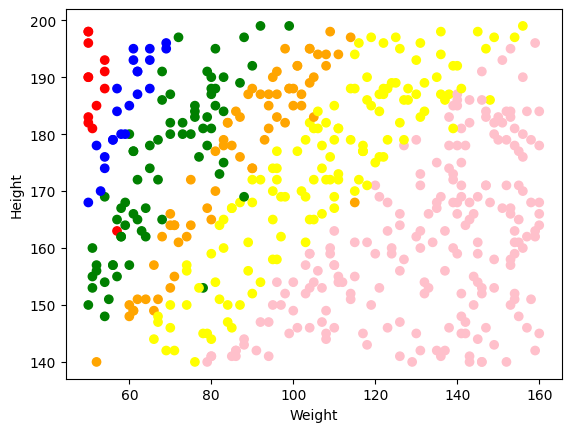

In [15]:
plt.scatter(dataframe["Weight"], dataframe["Height"], c=dataframe['Index'].map(colors))
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

8. Split the dataset into a training set and a testing set

In [16]:
X = dataframe.drop(columns=['Index']).values
y = dataframe['Index'].values

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.095, random_state=40)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(452, 3)
(452,)
(48, 3)
(48,)


9. Use the training set to train the model using the **.fit()** method

In [207]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

10. Use the test set to to test the model using the **.predict()** method

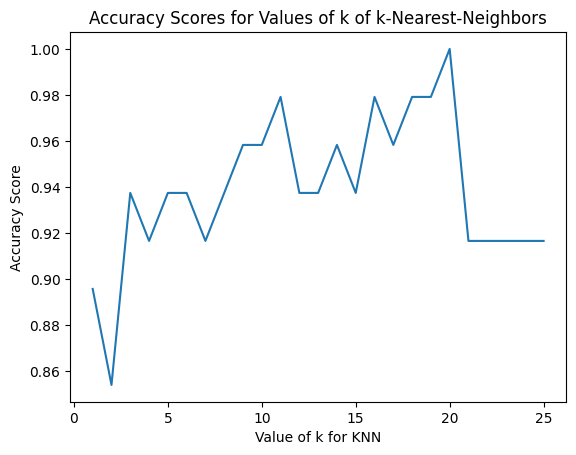

In [280]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

11. Get the accuracy score of your model

In [281]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

1.0

12. Make a prediction using examples that are not in the dataset by using the **.predict()** method

In [282]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[0, 174, 96]])


array([4])